# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 615
['port-aux-francais', 'vilyuchinsk', 'georgetown', 'albany', 'sinop', 'mcalester', 'gillette', 'udachny', 'nassau village-ratliff', 'ust-nera', 'bethel', 'loja', 'ilulissat', 'ola', 'colachel', 'camacupa', 'atafu village', 'edinburgh of the seven seas', 'tofol', 'adamstown', 'namdrik', 'waitangi', 'taltal', 'sao joao da barra', 'lompoc', 'blackmans bay', 'petropavlovsk-kamchatsky', 'puerto santa', 'grytviken', 'invercargill', 'nova sintra', 'itapecerica', 'smara', 'hamilton', 'haiku-pauwela', 'pisco', 'tiksi', 'pano aqil', 'san patricio', 'sampacho', 'port isabel', 'taiohae', 'tsiombe', 'puerto san carlos', 'college', 'chonchi', 'freetown', 'tazovsky', 'uturoa', 'puerto natales', 'carnarvon', 'hawaiian paradise park', 'utrik', 'sao jose da coroa grande', 'crane', 'dudinka', 'yellowknife', 'pihuamo', 'midvagur', 'isafjordur', 'iqaluit', 'bilibino', 'teguise', 'lubang', 'aykol', "nar'yan-mar", 'wamba', 'port mathurin', 'hachinohe', 'igarka', 'assare', 'j

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://history.openweathermap.org/data/2.5/history/city?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #params = {
       # 'Lattitude':{lat},
       # 'Longitude':lon,
       # 'date':date,
        #'appid':appid   
   # }
      
    
    
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}"
    response = requests.get(city_url).json()
    #print(city_url)

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}".format((record_count, set_count, city)))
    
   

    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as error:
        print("City not found. Skipping...")
        print(error)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | vilyuchinsk
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | sinop
Processing Record 6 of Set 1 | mcalester
Processing Record 7 of Set 1 | gillette
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | nassau village-ratliff
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | loja
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | ola
Processing Record 15 of Set 1 | colachel
Processing Record 16 of Set 1 | camacupa
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | tofol
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | namdrik
Processing Record 22 of Set 1 | waitangi
Processing Re

Processing Record 34 of Set 4 | makoua
Processing Record 35 of Set 4 | borzya
Processing Record 36 of Set 4 | bada
Processing Record 37 of Set 4 | toliara
Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | santo antonio do ica
Processing Record 40 of Set 4 | douentza
Processing Record 41 of Set 4 | pasni
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | mossel bay
Processing Record 44 of Set 4 | island harbour
Processing Record 45 of Set 4 | onokhoy
Processing Record 46 of Set 4 | tura
Processing Record 47 of Set 4 | khanty-mansiysk
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | broken hill
Processing Record 0 of Set 5 | krasnyy chikoy
Processing Record 1 of Set 5 | lae
Processing Record 2 of Set 5 | valparaiso
Processing Record 3 of Set 5 | gadzhiyevo
Processing Record 4 of Set 5 | vingt cinq
City not found. Skipping...
'weather'
Processing Record 5 of Set 5 | fale old settlement
Processing Record 6 of Set 5 | saipan
Proc

Processing Record 24 of Set 8 | kavieng
Processing Record 25 of Set 8 | yelizovo
Processing Record 26 of Set 8 | gornozavodsk
Processing Record 27 of Set 8 | bamboo flat
Processing Record 28 of Set 8 | sosnovka
Processing Record 29 of Set 8 | kirakira
Processing Record 30 of Set 8 | lydenburg
Processing Record 31 of Set 8 | luderitz
Processing Record 32 of Set 8 | jiayuguan
Processing Record 33 of Set 8 | datca
Processing Record 34 of Set 8 | yangquan
Processing Record 35 of Set 8 | arkhangel'sk
Processing Record 36 of Set 8 | murzuq
Processing Record 37 of Set 8 | ahau
City not found. Skipping...
'weather'
Processing Record 38 of Set 8 | verdal
Processing Record 39 of Set 8 | dazhong
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | tchintabaraden
Processing Record 42 of Set 8 | keflavik
Processing Record 43 of Set 8 | burang
Processing Record 44 of Set 8 | sao desiderio
Processing Record 45 of Set 8 | sitka
Processing Record 46 of Set 8 | phalaborwa
Processing Re

Processing Record 11 of Set 12 | valdivia
Processing Record 12 of Set 12 | sandnessjoen
Processing Record 13 of Set 12 | soio
Processing Record 14 of Set 12 | pyt-yakh
Processing Record 15 of Set 12 | san juan
Processing Record 16 of Set 12 | at taj
Processing Record 17 of Set 12 | nizhneudinsk
Processing Record 18 of Set 12 | khanpur mahar
Processing Record 19 of Set 12 | hengchun
Processing Record 20 of Set 12 | santa ana
Processing Record 21 of Set 12 | guangming
Processing Record 22 of Set 12 | la passe
Processing Record 23 of Set 12 | lafia
Processing Record 24 of Set 12 | su-ngai kolok
Processing Record 25 of Set 12 | neryungri
Processing Record 26 of Set 12 | manokwari
Processing Record 27 of Set 12 | fada n'gourma
Processing Record 28 of Set 12 | bengkulu
Processing Record 29 of Set 12 | longgang
Processing Record 30 of Set 12 | hobe sound
Processing Record 31 of Set 12 | altamirano
Processing Record 32 of Set 12 | mili
Processing Record 33 of Set 12 | ancud
Processing Record 3

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.33,76,75,15.36,TF,1696297220
1,vilyuchinsk,52.9306,158.4028,8.85,84,100,3.48,RU,1696297220
2,georgetown,5.4112,100.3354,28.86,89,20,1.54,MY,1696297154
3,albany,42.6001,-73.9662,15.75,86,15,1.34,US,1696297018
4,sinop,41.7711,34.8709,11.48,86,62,2.98,TR,1696297221


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.33,76,75,15.36,TF,1696297220
1,vilyuchinsk,52.9306,158.4028,8.85,84,100,3.48,RU,1696297220
2,georgetown,5.4112,100.3354,28.86,89,20,1.54,MY,1696297154
3,albany,42.6001,-73.9662,15.75,86,15,1.34,US,1696297018
4,sinop,41.7711,34.8709,11.48,86,62,2.98,TR,1696297221


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

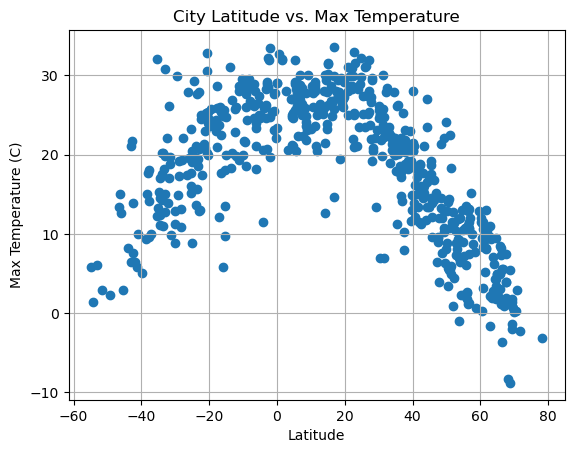

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

#### Latitude Vs. Humidity

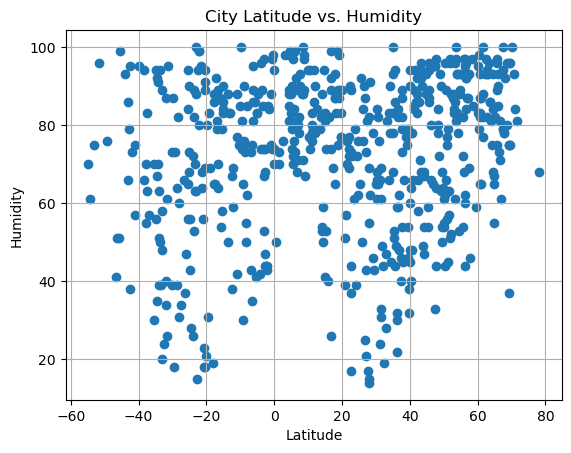

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

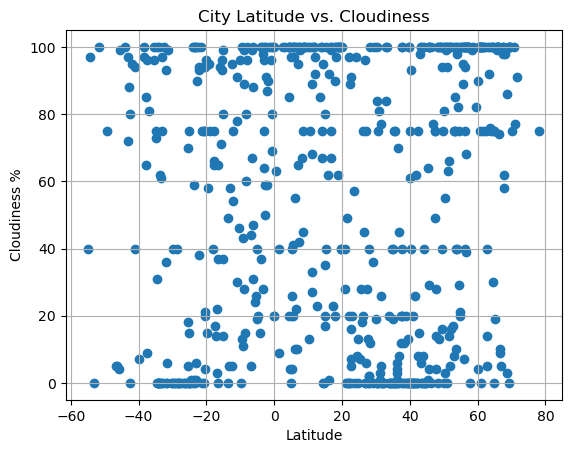

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

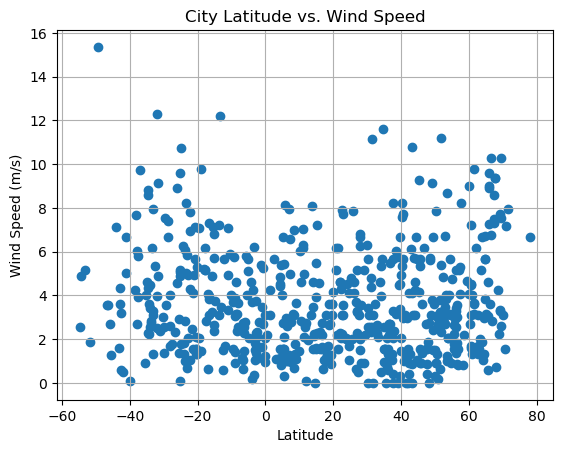

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vilyuchinsk,52.9306,158.4028,8.85,84,100,3.48,RU,1696297220
2,georgetown,5.4112,100.3354,28.86,89,20,1.54,MY,1696297154
3,albany,42.6001,-73.9662,15.75,86,15,1.34,US,1696297018
4,sinop,41.7711,34.8709,11.48,86,62,2.98,TR,1696297221
5,mcalester,34.9334,-95.7697,22.05,68,40,1.54,US,1696297221


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.33,76,75,15.36,TF,1696297220
11,loja,-3.9931,-79.2042,11.55,96,37,0.17,EC,1696297222
15,camacupa,-12.0167,17.4833,19.79,59,54,1.71,AO,1696297223
16,atafu village,-8.5421,-172.5159,28.82,73,15,4.60,TK,1696297223
17,edinburgh of the seven seas,-37.0676,-12.3116,10.01,57,81,9.74,SH,1696297223


###  Temperature vs. Latitude Linear Regression Plot

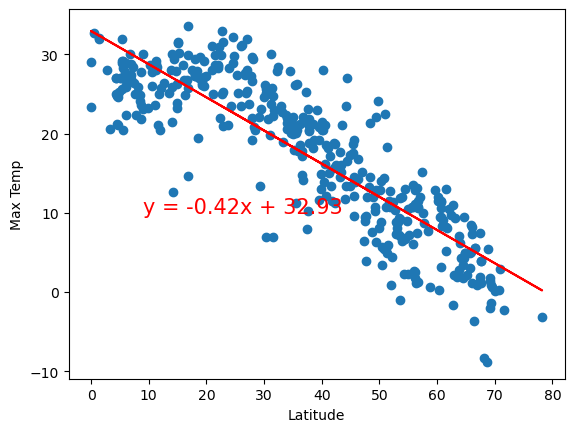

The r-value is:0.7481663821850774


In [24]:
# Linear regression on Northern Hemisphere
nh_x_values = northern_hemi_df['Lat']
nh_y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_x_values, nh_y_values)
regress_values = nh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_x_values, nh_y_values)
plt.plot(nh_x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(9,10),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

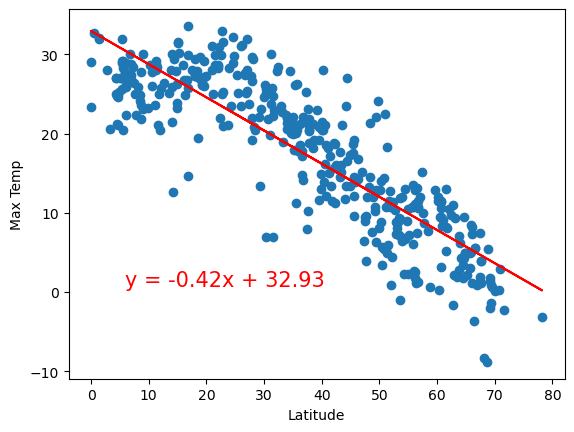

The r-value is:0.7481663821850774


In [16]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
sh_x_values = northern_hemi_df['Lat']
sh_y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_x_values, sh_y_values)
regress_values = sh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_x_values, nh_y_values)
plt.plot(nh_x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

**Discussion about the linear relationship:** There seems to be a strong inverse correlation between lattitude and temperature 

### Humidity vs. Latitude Linear Regression Plot

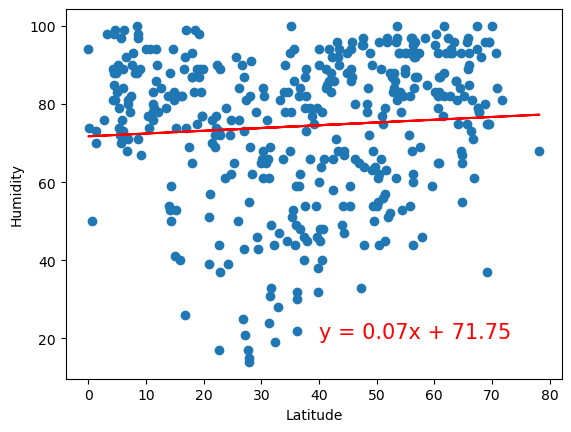

The r-value is:0.0053856524746406014
0.07060827806919047
71.75241115250172


In [27]:
# Northern Hemisphere
nh_lat = northern_hemi_df['Lat']
nh_hum = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_hum)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_lat, nh_hum)
plt.plot(nh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')


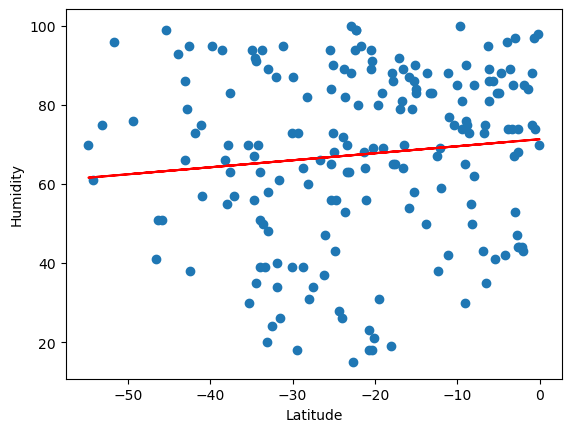

The r-value is:0.011851636390186831


In [59]:
# Southern Hemisphere
sh_lat = southern_hemi_df['Lat']
sh_hum = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_hum)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_lat, sh_hum)
plt.plot(sh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(2,0.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

**Discussion about the linear relationship:** There is a weak positive correlation between humidity and lattitude

### Cloudiness vs. Latitude Linear Regression Plot

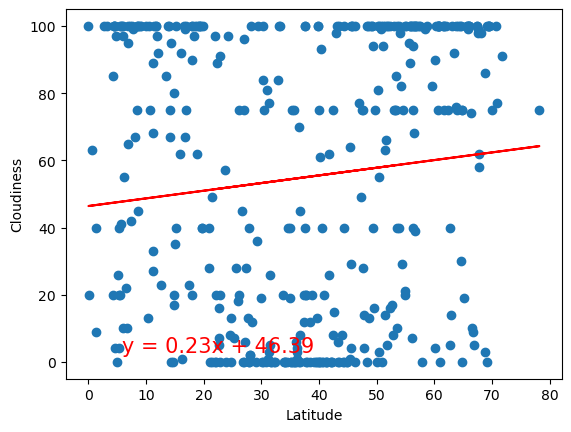

The r-value is:0.01183726524695912


In [45]:
# Northern Hemisphere
nh_lat = northern_hemi_df['Lat']
nh_cloudiness = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_cloudiness)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_lat, nh_cloudiness)
plt.plot(nh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(5.8,2.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

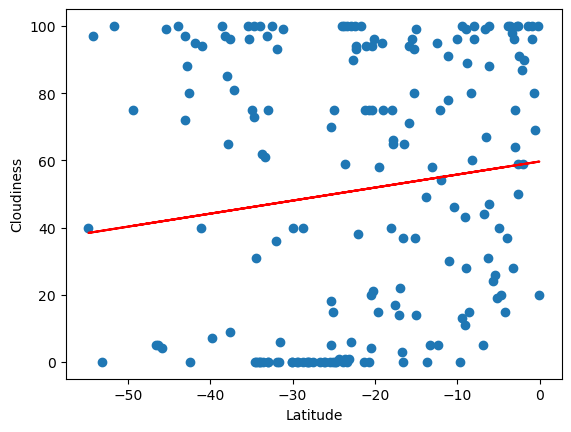

The r-value is:0.017451362161551284


In [56]:
# Southern Hemisphere
sh_lat = southern_hemi_df['Lat']
sh_cloudiness = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_cloudiness)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_lat, sh_cloudiness)
plt.plot(sh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

**Discussion about the linear relationship:** There is a weak correlation between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

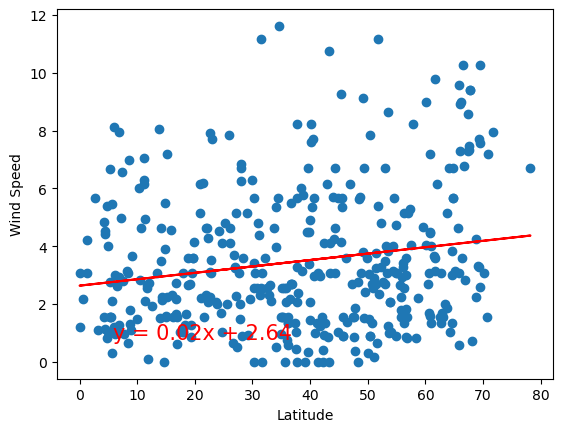

The r-value is:0.032690666356055574


In [21]:
# Northern Hemisphere
nh_lat = northern_hemi_df['Lat']
nh_wind_speed = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_wind_speed)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_lat, nh_wind_speed)
plt.plot(nh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

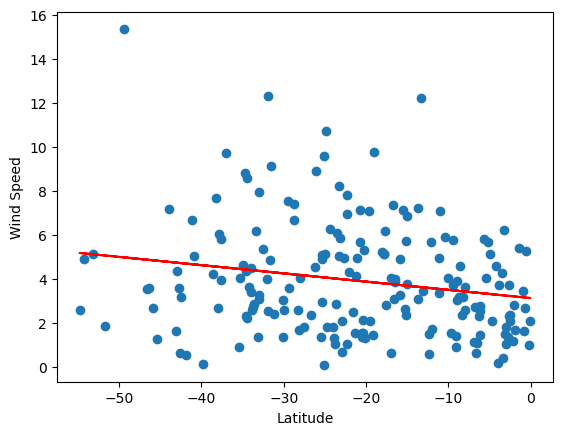

The r-value is:0.03853579028312608


In [52]:
# Southern Hemisphere
sh_lat = southern_hemi_df['Lat']
sh_wind_speed = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_wind_speed)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_lat, sh_wind_speed)
plt.plot(sh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(45,55),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

**Discussion about the linear relationship:** There seems to be a slight negative correlation between wind speed and latitude in the southern hemisphere, but it is still a weak corelation